In [9]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import time
import torchvision.models as models
from matplotlib import pyplot as plt

In [10]:
device = torch.device("mps")
device

device(type='mps')

### LOAD DATA

In [11]:
image_transforms = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness = 0.2, contrast =0.2),
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        
    ]
)

In [12]:
dataset_path = "./dataset"

dataset = datasets.ImageFolder(root=dataset_path, transform=image_transforms)
len(dataset)                               

2300

In [13]:
num_classes = len(dataset.classes)
num_classes

6

In [14]:
class_names = dataset.classes
class_names

['F_Breakage', 'F_Crushed', 'F_Normal', 'R_Breakage', 'R_Crushed', 'R_Normal']

In [15]:
train_size = int(len(dataset)*0.75)
val_size = int(len(dataset) - train_size)

train_size, val_size


(1725, 575)

In [16]:
from torch.utils.data import random_split

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [17]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle = True)

In [18]:
for images, labels in train_loader:
    print(images.shape)
    print(labels.shape)
    break

torch.Size([32, 3, 224, 224])
torch.Size([32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


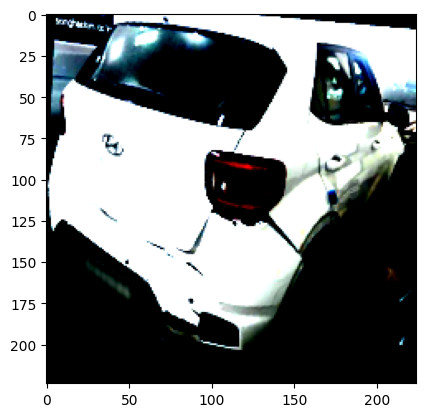

In [19]:
plt.imshow(images[1].permute(1,2,0))
plt.show()

### Model 1: CNN

In [21]:
class CarClassifierCNN(nn.Module):
    def __init__(self, num_classes):
        super.__init__()
        self.network = nn.sequential(
            nn.Conv2d(in_channels=3, out_channels = 16, kernal = (3,3), stride = 1, padding = 1), #(16, 224, 224)
            nn.ReLu(),
            nn.MaxPool2d(kernal = 2, stride = 2, padding = 0), #(32, 112,112)
            
            nn.Conv2d(in_channels = 16, out_channels = 32, kernal =(3,3), stride=1, padding =1),
            nn.ReLU(),
            nn.MaxPool2d(keranl = 2, stride =2, padding =0),#(32, 56, 56)
            
            nn.conv2d(in_channels = 32, out_channels=64, kernal =(3,3), stride =1, padding=1),
            nn.ReLu(),
            nn.MaxPool2d(kernal = 2, stride =2, padding =1),#(64, 28, 28)
            
            nn.Flatten(),
            nn.Linear(64*28*28, 512),
            nn.ReLu(),
            nn.Linear(512, num_classes)
        )
        def forward(self, x):
            x = self.network(x)
            return x

In [22]:
model = CarClassifierCNN(num_classes = num_classes).to (device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

TypeError: descriptor '__init__' of 'super' object needs an argument